Choose a numerical method: 1) FTCS; 2) Lax; 3)Lax-Wendroff: 1
Time for wave to move one grid spacing (Courant timestep tc) = 0.01
Wave circles the system in 1000.00 steps
20 out of 1000 steps completed.
41 out of 1000 steps completed.
62 out of 1000 steps completed.
83 out of 1000 steps completed.
104 out of 1000 steps completed.
125 out of 1000 steps completed.
146 out of 1000 steps completed.
167 out of 1000 steps completed.
188 out of 1000 steps completed.
209 out of 1000 steps completed.
230 out of 1000 steps completed.
251 out of 1000 steps completed.
272 out of 1000 steps completed.
293 out of 1000 steps completed.
314 out of 1000 steps completed.
335 out of 1000 steps completed.
356 out of 1000 steps completed.
377 out of 1000 steps completed.
398 out of 1000 steps completed.
419 out of 1000 steps completed.
440 out of 1000 steps completed.
461 out of 1000 steps completed.
482 out of 1000 steps completed.
503 out of 1000 steps completed.
524 out of 1000 steps completed.
545 out 

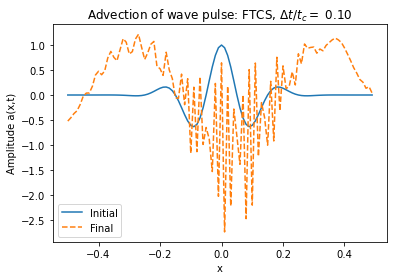

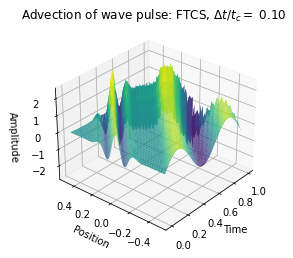

In [1]:
# Advect - program to solve the advection equation using the various hyperbolic PDE schemes.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Select the numerical parameters (time step, grid spacing, etc.)
method = eval(input('Choose a numerical method: 1) FTCS; 2) Lax; 3)Lax-Wendroff: '))
N = 100
L = 1.0  # System size
h = L/N  # Grid spacing
c = 1.0  # Wave speed

# Set up plot titles
if method == 1:  ### FTCS Method ###
    plotlabel = 'FTCS'
elif method == 2:  ### Lax Method ###
    plotlabel = 'Lax'
elif method == 3:  ### Lax-Wendroff Method  ###
    plotlabel = 'Lax-Wendroff'
else:
    raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')

print('Time for wave to move one grid spacing (Courant timestep tc) = {0:.2f}'.format(h/c))

tc = h/c
tau = 0.1
tau *= tc
coeff = -c*tau/(2.0*h)  # Coefficient used by all schemes
coefflw = 2*coeff**2  # Coefficient used by L-W scheme

print('Wave circles the system in {0:.2f} steps'.format(L/(c*tau)))
nStep = 1000

# Set initial and boundary conditions
sigma = 0.1  # Width of the Gaussian pulses
k_wave = np.pi/sigma  # Wave number of the cosine
x = np.arange(N)*h - L/2  # Coordinates of the grid points

# Set up initial condition to be a Gaussian-cosine pulse
a = np.empty(N)
for i in range(N):
    a[i] = np.cos(k_wave*x[i]) * np.exp(-x[i]**2/(2*sigma**2))

# Use periodic boundary conditions
ip = np.arange(N) + 1
ip[N-1] = 0  # ip  = i+1 with periodic b.c.
im = np.arange(N) - 1
im[0] = N-1  # im = i-1 with periodic b.c.

# Initialize plotting variables
iplot = 1  # Plot counter
nplots = 50  # Desired number of plots
aplot = np.empty((N, nplots))
tplot = np.empty(nplots)
aplot[:, 0] = np.copy(a)  # Record the initial state
tplot[0] = 0  # Record the initial time (t = 0)
plotStep = nStep/nplots + 1

# Loop over the desired number of steps
for iStep in range(nStep):  ## MAIN LOOP ##
    omega = 10
    a[0] = np.sin(omega*(iStep+1)*tau)
    a[N-1] = 0

    # Compute new values of wave amplitude using FTCS, Lax, or Lax-Wendroff method
    if method == 1:  ### FTCS Method ###
        a[:] = a[:] + coeff*(a[ip] - a[im])
    elif method == 2:  ### Lax Method ###
        a[:] = 0.5*(a[ip] + a[im]) + coeff*(a[ip] - a[im])
    elif method == 3:  ### Lax-Wendroff Method  ###
        a[:] = (a[:] + coeff*(a[ip] - a[im])) + coefflw*(a[ip] + a[im] - 2*a[:])
    else:
        raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')

    # Periodically record a(t) for plotting
    if (iStep+1) % plotStep < 1:  # Every plot_iter steps record
        aplot[:, iplot] = np.copy(a)
        tplot[iplot] = tau*(iStep+1)
        iplot += 1
        print('{0:g} out of {1:g} steps completed.'.format(iStep, nStep))

# Plot the initial and final states.
fig, ax = plt.subplots()
ax.set_title(r'Advection of wave pulse: ' + plotlabel + ', $\Delta t/t_c = $ {0:.2f}'.format(tau/tc))
ax.plot(x, aplot[:, 0], '-', label='Initial')
ax.plot(x, a, '--', label='Final')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude a(x,t)')
ax.legend()

# Plot the total wave amplitude versus position and time
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.set_title(r'Advection of wave pulse: ' + plotlabel + ', $\Delta t/t_c = $ {0:.2f}'.format(tau/tc))
Tp, Xp = np.meshgrid(tplot[0:iplot], x)  # Arrange data into a format suitable for 3D plots.
ax2.plot_surface(Tp, Xp, aplot[:, 0:iplot], rstride=1, cstride=1, cmap=cm.viridis)
ax2.view_init(elev=30., azim=-140.)
ax2.set_ylabel('Position')
ax2.set_xlabel('Time')
ax2.set_zlabel('Amplitude')

plt.show()

Choose a numerical method: 1) FTCS; 2) Lax; 3)Lax-Wendroff: 3
Time for wave to move one grid spacing (Courant timestep tc) = 0.02
time step.001
Wave circles the system in 50000.00 steps
60 out of 3000 steps completed.
121 out of 3000 steps completed.
182 out of 3000 steps completed.
243 out of 3000 steps completed.
304 out of 3000 steps completed.
365 out of 3000 steps completed.
426 out of 3000 steps completed.
487 out of 3000 steps completed.
548 out of 3000 steps completed.
609 out of 3000 steps completed.
670 out of 3000 steps completed.
731 out of 3000 steps completed.
792 out of 3000 steps completed.
853 out of 3000 steps completed.
914 out of 3000 steps completed.
975 out of 3000 steps completed.
1036 out of 3000 steps completed.
1097 out of 3000 steps completed.
1158 out of 3000 steps completed.
1219 out of 3000 steps completed.
1280 out of 3000 steps completed.
1341 out of 3000 steps completed.
1402 out of 3000 steps completed.
1463 out of 3000 steps completed.
1524 out of 300

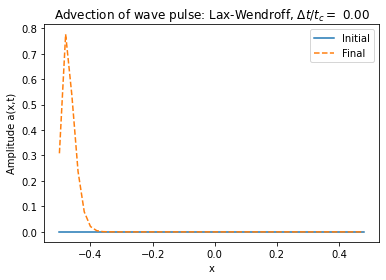

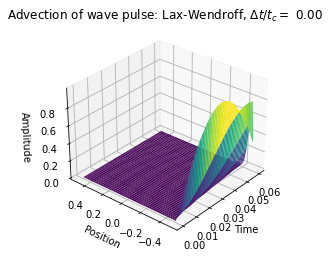

In [50]:
# Advect program to solve the advection equation using the various hyperbolic PDE schemes.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# Select the numerical parameters (time step, grid spacing, etc.)
method = eval(input('Choose a numerical method: 1) FTCS; 2) Lax; 3)Lax-Wendroff: '))
N = 50
L = 1.0  # System size
h = L/N  # Grid spacing
c = 1.0  # Wave speed

# Set up plot titles
if method == 1:  ### FTCS Method ###
    plotlabel = 'FTCS'
elif method == 2:  ### Lax Method ###
    plotlabel = 'Lax'
elif method == 3:  ### Lax-Wendroff Method  ###
    plotlabel = 'Lax-Wendroff'
else:
    raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')

print('Time for wave to move one grid spacing (Courant timestep tc) = {0:.2f}'.format(h/c))

tc = h/c
tau = float(input('time step'))
tau *= tc
coeff = -c*tau/(2.0*h)  # Coefficient used by all schemes
coefflw = 2*coeff**2  # Coefficient used by L-W scheme

print('Wave circles the system in {0:.2f} steps'.format(L/(c*tau)))
nStep = 3000

# Set initial and boundary conditions
sigma = 0.1  # Width of the Gaussian pulses
k_wave = np.pi/sigma  # Wave number of the cosine
x = np.arange(N)*h - L/2  # Coordinates of the grid points

# Set up initial condition to be a Gaussian-cosine pulse
a = np.zeros(N)

# Use periodic boundary conditions
ip = np.arange(N) + 1
ip[N-1] = 0  # ip  = i+1 with periodic b.c.
im = np.arange(N) - 1
im[0] = N-1  # im = i-1 with periodic b.c.

# Initialize plotting variables
iplot = 1  # Plot counter
nplots = 50  # Desired number of plots
aplot = np.empty((N, nplots))
tplot = np.empty(nplots)
aplot[:, 0] = np.copy(a)  # Record the initial state
tplot[0] = 0  # Record the initial time (t = 0)
plotStep = nStep/nplots + 1

# Loop over the desired number of steps
for iStep in range(nStep):  ## MAIN LOOP ##
    omega = 15*np.pi
    a[0] = np.sin(omega*(iStep+1)*tau)
    a[N-1] = 0

    # Compute new values of wave amplitude using FTCS, Lax, or Lax-Wendroff method
    if method == 1:  ### FTCS Method ###
        a[:] = a[:] + coeff*(a[ip] - a[im])
    elif method == 2:  ### Lax Method ###
        a[:] = 0.5*(a[ip] + a[im]) + coeff*(a[ip] - a[im])
    elif method == 3:  ### Lax-Wendroff Method  ###
        a[:] = (a[:] + coeff*(a[ip] - a[im])) + coefflw*(a[ip] + a[im] - 2*a[:])
    else:
        raise ValueError('Incorrect index chosen for method. Must choose 1, 2, or 3')

    # Periodically record a(t) for plotting
    if (iStep+1) % plotStep < 1:  # Every plot_iter steps record
        a[N-1] = 0
        a[0] = np.sin(omega*(iStep+1)*tau)
        aplot[:, iplot] = np.copy(a)
        tplot[iplot] = tau*(iStep+1)
        iplot += 1
        print('{0:g} out of {1:g} steps completed.'.format(iStep, nStep))

# Plot the initial and final states.
fig, ax = plt.subplots()
ax.set_title(r'Advection of wave pulse: ' + plotlabel + ', $\Delta t/t_c = $ {0:.2f}'.format(tau/tc))
ax.plot(x, aplot[:, 0], '-', label='Initial')
ax.plot(x, a, '--', label='Final')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude a(x,t)')
ax.legend()

# Plot the total wave amplitude versus position and time
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.set_title(r'Advection of wave pulse: ' + plotlabel + ', $\Delta t/t_c = $ {0:.2f}'.format(tau/tc))
Tp, Xp = np.meshgrid(tplot[0:iplot], x)  # Arrange data into a format suitable for 3D plots.
ax2.plot_surface(Tp, Xp, aplot[:, 0:iplot], rstride=1, cstride=1, cmap=cm.viridis)
ax2.view_init(elev=30., azim=-140.)
ax2.set_ylabel('Position')
ax2.set_xlabel('Time')
ax2.set_zlabel('Amplitude')

plt.show()

In [39]:
a

array([-0.04370422, -0.08009798, -0.15478641, -0.21578448, -0.26426545,
       -0.30141035, -0.32838892, -0.34634433, -0.35637981, -0.35954882,
       -0.35684641, -0.34920403, -0.33748457, -0.32248088, -0.30491373,
       -0.28543313, -0.26461836, -0.24298137, -0.22096824, -0.19896393,
       -0.17729458, -0.15623315, -0.13600204, -0.11677914, -0.09870053,
       -0.08186654, -0.06634417, -0.05217307, -0.03936751, -0.02792192,
       -0.01781247, -0.00900204, -0.00144129,  0.00492693,  0.01016706,
        0.01434705,  0.01753829,  0.0198125 ,  0.02124208,  0.02189764,
        0.02184873,  0.02116199,  0.01990218,  0.01813096,  0.01590816,
        0.01329114,  0.01033624,  0.00709874,  0.00363439,  0.00186041])

In [43]:
aplot

array([[ 0.00000000e+000,  1.46232818e-001,  2.94541743e-001, ...,
        -3.20369420e-001, -1.75805191e-001,  2.23441199e-314],
       [ 0.00000000e+000,  3.04795729e-001,  6.04599456e-001, ...,
        -6.44326575e-001, -3.48950031e-001, -3.40378346e+018],
       [ 0.00000000e+000,  2.37484428e-001,  5.14463507e-001, ...,
        -6.48824906e-001, -3.95389651e-001,  2.23363869e-314],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  8.60267860e-009, ...,
         9.83372630e-003,  8.78210025e-003, -8.85287049e+202],
       [ 0.00000000e+000,  0.00000000e+000,  3.55843313e-009, ...,
         4.99503739e-003,  4.47782054e-003,  1.09768973e-223],
       [ 0.00000000e+000,  1.85608973e-001,  3.43846470e-001, ...,
        -3.10200578e-001, -1.44010078e-001,  2.11375767e-192]])